<a href="https://colab.research.google.com/github/sebiyang/section-4-project/blob/main/section_4_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/nandwalritik/yoga-pose-videos-dataset

#1. EDA

###1.1 Data Collection
###### 파이썬에서 영상분석을 하기 위해서는, 영상 데이터를 이미지 데이터로 먼저 바꿔줘야합니다. 이 프로젝트에서는 `cv2.VideoCapture` 모듈을 이용해 영상 프레임들을 추출했습니다
###### In order to analyze video data in python, changing data fomat as image should be done first. In this project, this process has been done with using the module `cv2.VideoCapture` by extracting the frame in video

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
#"C:\Users\sebiy\OneDrive\바탕 화면\Yoga_Vid_Collected\Abhay_Bhujangasana.mp4"
#/content/drive/MyDrive/Codestates/section4/project data/Yoga_Vid_Collected

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
len(glob('/content/drive/MyDrive/Codestates/section4/project data/Yoga_Vid_Collected/*.mp4')) #88개 동영상
file_paths = glob('/content/drive/MyDrive/Codestates/section4/project data/Yoga_Vid_Collected/*/*.mp4')

In [4]:
cap = cv2.VideoCapture(file_paths[0]) #인자 생성 

frames = [] #동영상 프레임을 저장 할 곳 
while True: #리턴값이 True 인 경우만 읽을 것임 
    ret, frame = cap.read() #프레임 하나씩 읽어와서 반환, 리턴값 반환
    if not ret: #남은 리턴값이 false = 더이상 읽을 프레임 없음
        break

    frame = cv2.resize(frame, (256, 256)) #사이즈 조정 
    frame = frame[:, :, [2, 1, 0]] #BGR -> RGB로 변경 
    frames.append(frame) #읽어온 프레임들을 리스트에 저장 
cap.release()

In [5]:
len(frames) /88 #동영상의 총 프레임 수 #평균적으로 영상 1개당 16컷정도

6.193181818181818

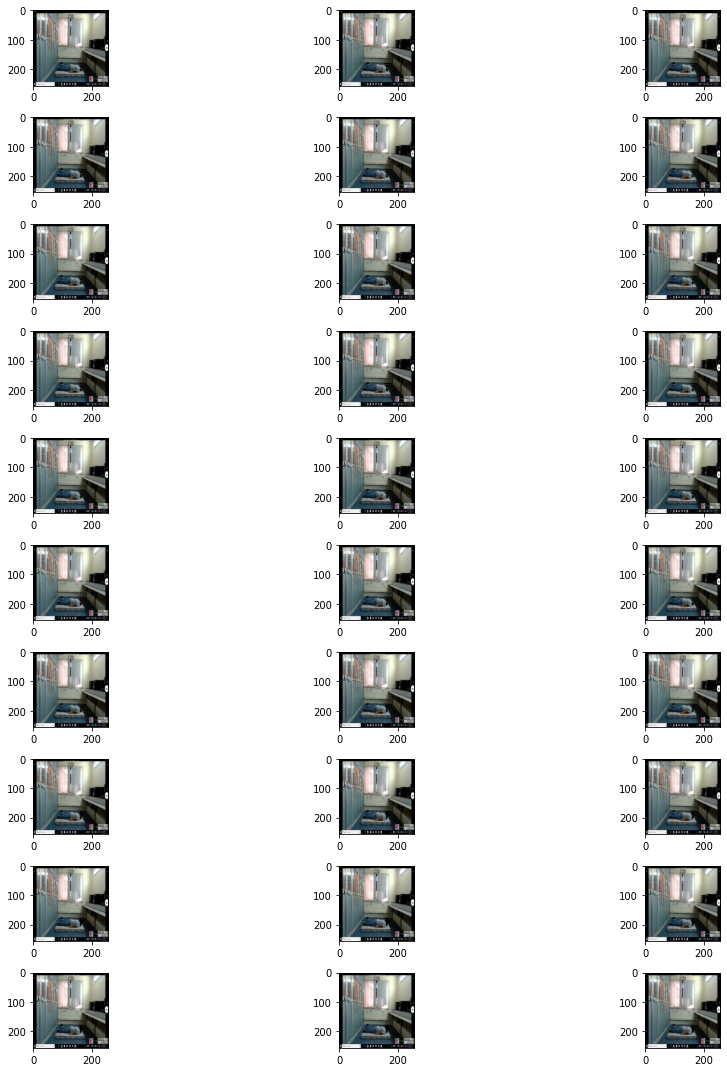

In [6]:
arr = np.array(frames)
plt.figure(figsize=(15, 15))
for i in range(10):
    plt.subplot(10, 3, 1 + 3*i)
    plt.imshow(arr[1 + 3*i])
    plt.subplot(10, 3, 2 + 3*i)
    plt.imshow(arr[2 + 3*i])
    plt.subplot(10, 3, 3 + 3*i)
    plt.imshow(arr[3 + 3*i])
plt.tight_layout()

In [7]:
for file_path in file_paths:
    cap = cv2.VideoCapture(file_path)
    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(file_path)
    print(length, 'frames')
    print(length / 88, 'sec')
    cap.release()
    break

/content/drive/MyDrive/Codestates/section4/project data/Yoga_Vid_Collected/Bhujangasana/Abhay_Bhujangasana.mp4
545 frames
6.193181818181818 sec


In [8]:
print(file_path.split('/')[8])

Bhujangasana


###1.2. Extracting attribute information from image data

In [9]:
import pandas as pd

df = pd.DataFrame(columns=[
    'file_path', 'frames', 'duration',
    'label'
])

for file_path in file_paths:
    label = file_path.split('/')[8] # 파일 경로에서 "요가동작이름" 을 라벨로 지정
    
    cap = cv2.VideoCapture(file_path)
    frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) #.get-> 속성 반환 #CAP_PROP_FRAME_COUNT -> 비디오의 총 프레임 수 
    duration = frames / 88  #영상길이 = 프레임 수 / 88
    elem = {
        'file_path': file_path,
        'frames': frames,
        'duration': duration,
        'label': label
    }
    df.loc[len(df)] = elem
    cap.release() #출력 

In [10]:
df

,file_path,frames,duration,label
0,/content/drive/MyDrive/Codestates/section4/pro...,545,6.193182,Bhujangasana
1,/content/drive/MyDrive/Codestates/section4/pro...,1413,16.056818,Bhujangasana
2,/content/drive/MyDrive/Codestates/section4/pro...,1227,13.943182,Bhujangasana
3,/content/drive/MyDrive/Codestates/section4/pro...,1607,18.261364,Bhujangasana
4,/content/drive/MyDrive/Codestates/section4/pro...,1468,16.681818,Bhujangasana
...,...,...,...,...
83,/content/drive/MyDrive/Codestates/section4/pro...,937,10.647727,Shavasana
84,/content/drive/MyDrive/Codestates/section4/pro...,1391,15.806818,Shavasana
85,/content/drive/MyDrive/Codestates/section4/pro...,1345,15.284091,Shavasana
86,/content/drive/MyDrive/Codestates/section4/pro...,1258,14.295455,Shavasana


###1.3. Visualization

In [11]:
df_duration_sum_by_label = df.groupby('label').\
    duration.sum().rename('Sum').reset_index().\
    set_index('label')

df_duration_avg_by_label = df.groupby('label').\
    duration.mean().rename('Average').reset_index().\
    set_index('label')

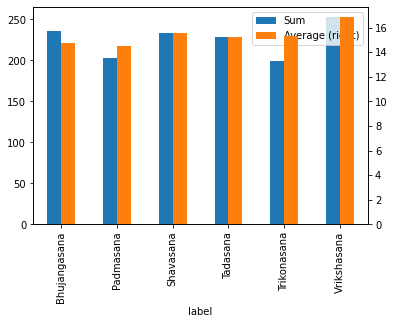

In [12]:
df_video_stats = \
    pd.concat([df_duration_sum_by_label, df_duration_avg_by_label],
              axis=1)
df_video_stats.plot.bar(secondary_y='Average')

In [13]:
df['> 15.0 Sec'] = df['duration'] >= 15.0
df['10.0 - 5.0 Sec'] = \
    (10.0 <= df['duration']) & (df['duration'] < 15.0)
df['0.0 - 5.0 Sec'] = \
    (0.0 <= df['duration']) & (df['duration'] < 5.0)
df

,file_path,frames,duration,label,> 15.0 Sec,10.0 - 5.0 Sec,0.0 - 5.0 Sec
0,/content/drive/MyDrive/Codestates/section4/pro...,545,6.193182,Bhujangasana,False,False,False
1,/content/drive/MyDrive/Codestates/section4/pro...,1413,16.056818,Bhujangasana,True,False,False
2,/content/drive/MyDrive/Codestates/section4/pro...,1227,13.943182,Bhujangasana,False,True,False
3,/content/drive/MyDrive/Codestates/section4/pro...,1607,18.261364,Bhujangasana,True,False,False
4,/content/drive/MyDrive/Codestates/section4/pro...,1468,16.681818,Bhujangasana,True,False,False
...,...,...,...,...,...,...,...
83,/content/drive/MyDrive/Codestates/section4/pro...,937,10.647727,Shavasana,False,True,False
84,/content/drive/MyDrive/Codestates/section4/pro...,1391,15.806818,Shavasana,True,False,False
85,/content/drive/MyDrive/Codestates/section4/pro...,1345,15.284091,Shavasana,True,False,False
86,/content/drive/MyDrive/Codestates/section4/pro...,1258,14.295455,Shavasana,False,True,False


In [14]:
df.groupby('label').count()

,file_path,frames,duration,> 15.0 Sec,10.0 - 5.0 Sec,0.0 - 5.0 Sec
label,,,,,,
Bhujangasana,16,16,16,16,16,16
Padmasana,14,14,14,14,14,14
Shavasana,15,15,15,15,15,15
Tadasana,15,15,15,15,15,15
Trikonasana,13,13,13,13,13,13
Vrikshasana,15,15,15,15,15,15


In [15]:
df_groupby_label = df.groupby('label')
df_groupby_stats = pd.concat([
    df_groupby_label['0.0 - 5.0 Sec'].
    sum().reset_index().set_index('label'),
    df_groupby_label['10.0 - 5.0 Sec'].
    sum().reset_index().set_index('label'),
    df_groupby_label['> 15.0 Sec'].
    sum().reset_index().set_index('label'),
], axis=1)

df_groupby_stats

,0.0 - 5.0 Sec,10.0 - 5.0 Sec,> 15.0 Sec
label,,,
Bhujangasana,0,7,7
Padmasana,0,6,6
Shavasana,0,8,7
Tadasana,0,10,5
Trikonasana,0,6,7
Vrikshasana,0,5,10


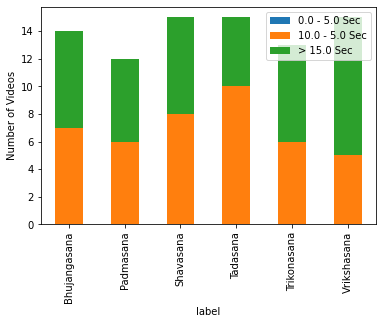

In [16]:
df_groupby_stats.plot.bar(stacked=True,
                          ylabel='Number of Videos')

#2. Preprocessing

###2.1. train/validation split 

In [17]:
#각각의 프레임들을 2D로 분류 
#최종적인 예측값을 비디오의 예측값으로 봄

import cv2
import random
import numpy as np
import pandas as pd
from glob import glob

#file_paths = glob('/content/drive/MyDrive/Codestates/section4/project data/Yoga_Vid_Collected/')

label_dir = glob('/content/drive/MyDrive/Codestates/section4/project data/Yoga_Vid_Collected/*')
label_dir

['/content/drive/MyDrive/Codestates/section4/project data/Yoga_Vid_Collected/Bhujangasana',
 '/content/drive/MyDrive/Codestates/section4/project data/Yoga_Vid_Collected/Padmasana',
 '/content/drive/MyDrive/Codestates/section4/project data/Yoga_Vid_Collected/Tadasana',
 '/content/drive/MyDrive/Codestates/section4/project data/Yoga_Vid_Collected/Trikonasana',
 '/content/drive/MyDrive/Codestates/section4/project data/Yoga_Vid_Collected/Vrikshasana',
 '/content/drive/MyDrive/Codestates/section4/project data/Yoga_Vid_Collected/Shavasana']

In [18]:
# 6개의 클래스
# 클래스당 약 13-15개의 영상 그룹
# 1 ~ 10 : 학습 그룹
#11 ~ 14 : 테스트 그룹


label_dirs = glob('/content/drive/MyDrive/Codestates/section4/project data/Yoga_Vid_Collected/*')
file_dirs = glob('/content/drive/MyDrive/Codestates/section4/project data/Yoga_Vid_Collected/*/*') #파일 디렉토리 


from sklearn.model_selection import train_test_split

X = df[['file_path']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [19]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

70
18
70
18


In [20]:
train_df = pd.concat([X_train,y_train],axis=1)
valid_df = pd.concat([X_test,y_test],axis=1)

In [21]:
print(len(train_df))
print(len(valid_df))

70
18


In [22]:
train_df

,file_path,label
55,/content/drive/MyDrive/Codestates/section4/pro...,Trikonasana
73,/content/drive/MyDrive/Codestates/section4/pro...,Shavasana
11,/content/drive/MyDrive/Codestates/section4/pro...,Bhujangasana
30,/content/drive/MyDrive/Codestates/section4/pro...,Tadasana
40,/content/drive/MyDrive/Codestates/section4/pro...,Tadasana
...,...,...
20,/content/drive/MyDrive/Codestates/section4/pro...,Padmasana
60,/content/drive/MyDrive/Codestates/section4/pro...,Vrikshasana
71,/content/drive/MyDrive/Codestates/section4/pro...,Vrikshasana
14,/content/drive/MyDrive/Codestates/section4/pro...,Bhujangasana


###2.2. save splitted data

In [23]:
train_df.to_csv('yoga_train_vid.csv', index=False)
valid_df.to_csv('yoga_valid_vid.csv', index=False)

###2.3. create frame data 

In [24]:
file_paths = df['file_path']
file_paths[1]

'/content/drive/MyDrive/Codestates/section4/project data/Yoga_Vid_Collected/Bhujangasana/Ameya_Bhujangasana.mp4'

In [25]:
from google.colab.patches import cv2_imshow

SAVE_DIR ='/content/drive/MyDrive/Codestates/section4/project data/Yoga_Vid_Collected_1/'
max_frame = 10

for i, elem in train_df.iterrows():
    cap = cv2.VideoCapture(
        elem['file_path']
    )
    
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
            
        frame = cv2.resize(frame, (256, 256))
        frames.append(frame)
        
        if len(frames) == max_frame:
            break
            
    label = elem['label']
    for j, frame in enumerate(frames):
        file_name = f'train/{label}_{i}_{j}.png'
        cv2.imwrite(SAVE_DIR + file_name, frame)
    
    cap.release()

In [26]:
# 이미지 확인 
print(len(glob(SAVE_DIR + 'train/*')))

700


In [27]:
len(frames)

10

In [28]:
SAVE_DIR ='/content/drive/MyDrive/Codestates/section4/project data/Yoga_Vid_Collected_1/'
max_frame = 10

for i, elem in valid_df.iterrows():
    cap = cv2.VideoCapture(
        elem['file_path']
    )
    
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
            
        frame = cv2.resize(frame, (256, 256))
        frames.append(frame)
        
        if len(frames) == max_frame:
            break
            
    label = elem['label']
    for j, frame in enumerate(frames):
        file_name = f'valid/{label}_{i}_{j}.png'
        cv2.imwrite(SAVE_DIR + file_name, frame)
    
    cap.release()

In [29]:
print(len(glob(SAVE_DIR + 'valid/*')))

180


#3. CNN approch

###3.1. build data generator

In [30]:
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
from glob import glob
from tqdm import tqdm

In [31]:
LABEL_INT_DICT = np.unique(pd.read_csv('yoga_train_vid.csv')['label'])
LABEL_STR_DICT = {k:v for v, k in enumerate(LABEL_INT_DICT)}
pprint(LABEL_INT_DICT)
pprint(LABEL_STR_DICT)

array(['Bhujangasana', 'Padmasana', 'Shavasana', 'Tadasana',
       'Trikonasana', 'Vrikshasana'], dtype=object)
{'Bhujangasana': 0,
 'Padmasana': 1,
 'Shavasana': 2,
 'Tadasana': 3,
 'Trikonasana': 4,
 'Vrikshasana': 5}


In [ ]:
#Reference: Data Generator?
#http://www.kwangsiklee.com/2018/11/keras%EC%97%90%EC%84%9C-sequence%EB%A5%BC-%EC%9D%B4%EC%9A%A9%ED%95%98%EC%97%AC-%EB%8C%80%EC%9A%A9%EB%9F%89-%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B-%EC%B2%98%EB%A6%AC%ED%95%98%EA%B8%B0/

In [32]:
import albumentations as A
import cv2
import math
import tensorflow as tf
from tensorflow import keras

class DataGenerator(keras.utils.Sequence): #상속

  #constructor function 
    def __init__(self, batch_size, image_size,
                 mode='train', shuffle=True):
        assert mode in ['train', 'valid']  #모드 지정 
        self.mode = mode
        self.shuffle = shuffle
        self.batch_size = batch_size
        self.image_size = image_size
        
        #data argumentation
        if self.mode == 'train':         
            self.transform = A.Compose([  
                A.HorizontalFlip(p=0.5),
                A.ShiftScaleRotate(
                    p=0.5,
                    shift_limit=0.05,
                    scale_limit=0.05,
                    rotate_limit=15,
                ),
            ])
        
        #Specify the path to save the image
        self.img_paths = glob(f'/content/drive/MyDrive/Codestates/section4/project data/Yoga_Vid_Collected_1/{mode}/*.png')

     # Number of batch in the Sequence.
    def __len__(self):
        return math.ceil(len(self.img_paths) / self.batch_size)
    
    #Generate one batch of data
    def __getitem__(self, idx):
        strt = idx * self.batch_size 
        fin = (idx + 1) * self.batch_size
        data = self.img_paths[strt:fin]
    
        batch_x, batch_y = self.get_data(data)

        return np.array(batch_x), np.array(batch_y)
        
    def get_data(self, data):
        batch_x = []
        batch_y = []
    
        for img_path in data:
            img = cv2.imread(img_path) #read data
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  #bgr->rgb
            img = cv2.resize(img, (self.image_size, self.image_size)) #resize

            if self.mode == 'train':
                augmented = self.transform(image=img)  #augmented data
                img = augmented['image']
            
            img = img.astype('float32')
            img = img / 255.
            
            label = img_path.split('/')[-1].split('_')[0]  #set label
            label = LABEL_STR_DICT[label] #save
                 
            batch_x.append(img) #set batch
            batch_y.append(label)
        
        return batch_x, batch_y

    #Updates indexes after each epoch
    #prevent training identical data at each epoch -> making robust model               
    def on_epoch_end(self):
        if self.shuffle:
            random.shuffle(self.img_paths)

#create data generator           
train_generator = DataGenerator(
    mode='train',
    batch_size=20, #len(total image of train data)=700
    image_size=256,
    shuffle=True)

valid_generator = DataGenerator(
    mode='valid',
    batch_size=20,  #len(total image of validation data)=180
    image_size=256,
    shuffle=True)

###3.2. build model

In [34]:
import os
import tensorflow_hub as hub #get pre trained model 

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2",trainable=True),  # Can be True, see below.
    tf.keras.layers.Dense(6, activation='softmax')
])
model.build([None, 256, 256, 3])  # None = Batch index

adam = keras.optimizers.Adam(lr=0.0001)
model.compile(
    optimizer=adam,
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              5919312   
                                                                 
 dense (Dense)               (None, 6)                 7686      
                                                                 
Total params: 5,926,998
Trainable params: 5,866,390
Non-trainable params: 60,608
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


###3.3. fit

In [35]:
os.mkdir('/content/drive/MyDrive/Codestates/section4/project data/Yoga_Vid_Collected_1/weights')

In [36]:
filepath = '/content/drive/MyDrive/Codestates/section4/project data/Yoga_Vid_Collected_1/weights/{epoch:02d}-{val_accuracy:.2f}.hdf5'

#set callback
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath, monitor='val_loss', verbose=1, save_best_only=True,
    save_weights_only=False, mode='min'
)

#fit
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    verbose=1,
    callbacks=[
        model_checkpoint
    ],
)

Epoch 1/10
35/35 [==============================] - ETA: 0s - loss: 1.7063 - accuracy: 0.2786
Epoch 1: val_loss improved from inf to 1.43980, saving model to /content/drive/MyDrive/Codestates/section4/project data/Yoga_Vid_Collected_1/weights/01-0.23.hdf5
35/35 [==============================] - 183s 5s/step - loss: 1.7063 - accuracy: 0.2786 - val_loss: 1.4398 - val_accuracy: 0.2333
Epoch 2/10
35/35 [==============================] - ETA: 0s - loss: 0.9760 - accuracy: 0.7186
Epoch 2: val_loss improved from 1.43980 to 1.14349, saving model to /content/drive/MyDrive/Codestates/section4/project data/Yoga_Vid_Collected_1/weights/02-0.45.hdf5
35/35 [==============================] - 160s 5s/step - loss: 0.9760 - accuracy: 0.7186 - val_loss: 1.1435 - val_accuracy: 0.4500
Epoch 3/10
35/35 [==============================] - ETA: 0s - loss: 0.4377 - accuracy: 0.9057
Epoch 3: val_loss did not improve from 1.14349
35/35 [==============================] - 158s 5s/step - loss: 0.4377 - accuracy: 0.

####3.4. visualize 

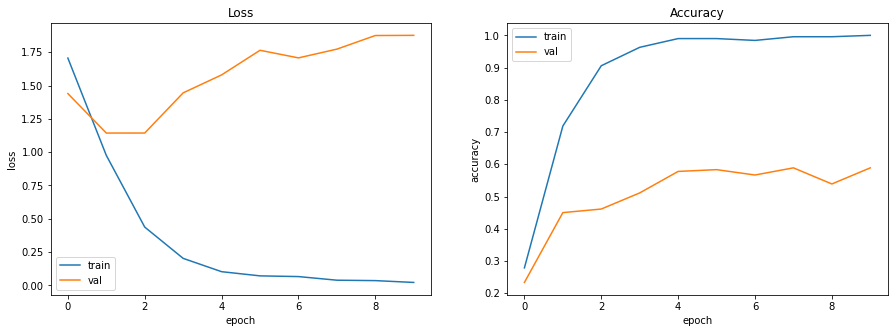

In [37]:
import matplotlib.pyplot as plt
history = history.history

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='train')
plt.plot(history['val_loss'], label='val')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title("Loss")

plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='train')
plt.plot(history['val_accuracy'], label='val')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title("Accuracy")
plt.show()

#4. RNN approch

In [40]:
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

#'/content/drive/MyDrive/Codestates/section4/project data/Yoga_Vid_Collected_1/weights/{epoch:02d}-{val_accuracy:.2f}.hdf5'

model = keras.models.load_model(
    '/content/drive/MyDrive/Codestates/section4/project data/Yoga_Vid_Collected_1/weights/02-0.45.hdf5',
    custom_objects={'KerasLayer':hub.KerasLayer} 
)

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              5919312   
                                                                 
 dense (Dense)               (None, 6)                 7686      
                                                                 
Total params: 5,926,998
Trainable params: 5,866,390
Non-trainable params: 60,608
_________________________________________________________________


In [42]:
feature_extractor = keras.Sequential(
    [
        keras.Input(shape=(256, 256, 3)),
        model.layers[0]
    ], name='feature_extractor'
)

feature_extractor.summary()

Model: "feature_extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              5919312   
                                                                 
Total params: 5,919,312
Trainable params: 5,858,704
Non-trainable params: 60,608
_________________________________________________________________


In [43]:
os.mkdir('/content/drive/MyDrive/Codestates/section4/project data/Yoga_Vid_Collected_1/weights/npy')
os.mkdir('/content/drive/MyDrive/Codestates/section4/project data/Yoga_Vid_Collected_1/weights/npy/train')
os.mkdir('/content/drive/MyDrive/Codestates/section4/project data/Yoga_Vid_Collected_1/weights/npy/valid')

In [46]:
max_frames = 10
SAVE_DIR = '/content/drive/MyDrive/Codestates/section4/project data/Yoga_Vid_Collected_1/weights/npy/'
train_df = pd.read_csv('yoga_train_vid.csv')
valid_df = pd.read_csv('yoga_valid_vid.csv')

In [47]:
for i, elem in tqdm(train_df.iterrows(),
                    total=len(train_df)):
    label = elem['label']
    cap = cv2.VideoCapture(
        elem['file_path']
    )
    
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
            
        frame_ = frame.copy()
        frame_ = cv2.cvtColor(frame_, cv2.COLOR_BGR2RGB)
        frame_ = cv2.resize(frame_, (256, 256))
        frame_ = frame_.astype('float32')
        frame_ = frame_ / 255.
        
        frames.append(frame_)
        if len(frames) == max_frames:
            break
    cap.release()
    
    frames = np.array(frames)
    features = feature_extractor.predict(frames)
    
    file_name = SAVE_DIR + f'train/{label}_{i}.npy'
    np.save(file_name, features)

100%|██████████| 70/70 [00:50<00:00,  1.38it/s]


In [48]:
print(len(glob(SAVE_DIR + 'train/*')))

70


In [49]:
for i, elem in tqdm(valid_df.iterrows(),
                    total=len(valid_df)):
    label = elem['label']
    cap = cv2.VideoCapture(
        elem['file_path']
    )
    
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
            
        frame_ = frame.copy()
        frame_ = cv2.cvtColor(frame_, cv2.COLOR_BGR2RGB)
        frame_ = cv2.resize(frame_, (256, 256))
        frame_ = frame_.astype('float32')
        frame_ = frame_ / 255.
        
        frames.append(frame_)
        if len(frames) == max_frames:
            break
    cap.release()
    
    frames = np.array(frames)
    features = feature_extractor.predict(frames)
    
    file_name = SAVE_DIR + f'valid/{label}_{i}.npy'
    np.save(file_name, features)

100%|██████████| 18/18 [00:10<00:00,  1.73it/s]


In [50]:
print(len(glob(SAVE_DIR + 'valid/*')))

18


In [59]:
os.environ['CUDA_VISIBLE_DEVICES'] = '5'

MAX_FRAMES = 10
NUM_FEATURES = 1280

def build_model():
    inputs = keras.Input((MAX_FRAMES, NUM_FEATURES))
    x = keras.layers.LSTM(64, return_sequences=True)(
        inputs
    )
    x = keras.layers.LSTM(64, return_sequences=False)(
        x
    )
    x = keras.layers.Dropout(0.3)(x)
    outputs = keras.layers.Dense(len(LABEL_INT_DICT),
                                 activation='softmax')(x)
    
    model = keras.Model(inputs, outputs)
    return model
    
adam = keras.optimizers.Adam(lr=0.0001)
model = build_model()

model.compile(
    optimizer=adam,
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)

model.summary()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 10, 1280)]        0         
                                                                 
 lstm_2 (LSTM)               (None, 10, 64)            344320    
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
Total params: 377,734
Trainable params: 377,734
Non-trainable params: 0
_________________________________________________________________


In [61]:
import albumentations as A
import cv2
import math
import tensorflow as tf
from tensorflow import keras

class DataGenerator(keras.utils.Sequence):
    def __init__(self, batch_size,
                 mode='train', shuffle=True):
        assert mode in ['train', 'valid']
        self.mode = mode
        self.shuffle = shuffle
        self.batch_size = batch_size
        
        #'/content/drive/MyDrive/Codestates/section4/project data/Yoga_Vid_Collected_1/weights/npy/'
        self.npy_paths = glob(
            f'/content/drive/MyDrive/Codestates/section4/project data/Yoga_Vid_Collected_1/weights/npy/{mode}/*.npy'
        )

    def __len__(self):
        return math.ceil(len(self.npy_paths) / self.batch_size)
    
    def __getitem__(self, idx):
        strt = idx * self.batch_size
        fin = (idx + 1) * self.batch_size
        data = self.npy_paths[strt:fin]
    
        batch_x, batch_y = self.get_data(data)

        return np.array(batch_x), np.array(batch_y)
        
    def get_data(self, data):
        batch_x = []
        batch_y = []
    
        for npy_path in data:
            npy = np.load(npy_path)
            
            label = npy_path.split('/')[-1]. \
                 split('_')[0]
            label = LABEL_STR_DICT[label]
                 
            batch_x.append(npy)
            batch_y.append(label)
        
        return batch_x, batch_y
                     
    def on_epoch_end(self):
        if self.shuffle:
            random.shuffle(self.npy_paths)
            
train_generator = DataGenerator(
    mode='train',
    batch_size=128,
    shuffle=True)

valid_generator = DataGenerator(
    mode='valid',
    batch_size=128,
    shuffle=True)

In [63]:
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=100,
    verbose=1
)

Epoch 1/100
1/1 [==============================] - 0s 500ms/step - loss: 0.9422 - accuracy: 0.7857 - val_loss: 1.2636 - val_accuracy: 0.4444
Epoch 2/100
1/1 [==============================] - 1s 879ms/step - loss: 0.9204 - accuracy: 0.7714 - val_loss: 1.2554 - val_accuracy: 0.4444
Epoch 3/100
1/1 [==============================] - 0s 298ms/step - loss: 0.9143 - accuracy: 0.7714 - val_loss: 1.2477 - val_accuracy: 0.4444
Epoch 4/100
1/1 [==============================] - 0s 276ms/step - loss: 0.8754 - accuracy: 0.8000 - val_loss: 1.2401 - val_accuracy: 0.4444
Epoch 5/100
1/1 [==============================] - 0s 283ms/step - loss: 0.8451 - accuracy: 0.8286 - val_loss: 1.2330 - val_accuracy: 0.4444
Epoch 6/100
1/1 [==============================] - 0s 281ms/step - loss: 0.8591 - accuracy: 0.8429 - val_loss: 1.2261 - val_accuracy: 0.4444
Epoch 7/100
1/1 [==============================] - 0s 274ms/step - loss: 0.8203 - accuracy: 0.8571 - val_loss: 1.2196 - val_accuracy: 0.4444
Epoch 8/100
1

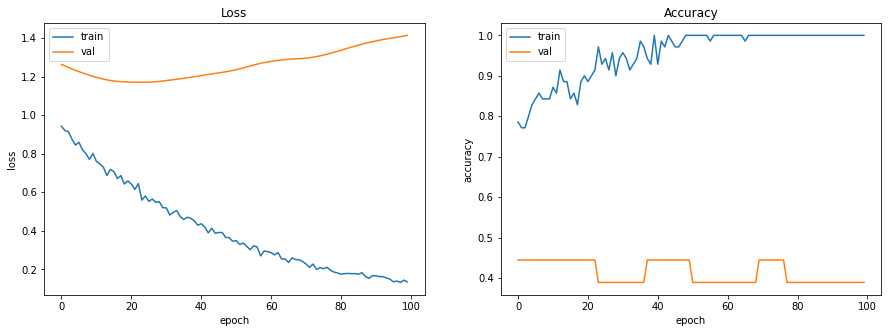

In [64]:
import matplotlib.pyplot as plt
history = history.history

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='train')
plt.plot(history['val_loss'], label='val')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title("Loss")

plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='train')
plt.plot(history['val_accuracy'], label='val')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title("Accuracy")
plt.show()